In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
#Load data, low_memory = False added to alleviate DtypeWarning: Columns (3,4,5,6,12) have mixed types.
salaries = pd.read_csv("Salaries.csv", low_memory=False)

In [3]:
# 1. How have salaries changed over time between different groups of people?
# Create a DataFrame from salaries data
df = pd.DataFrame(salaries)

In [21]:
#Group data by average total pay by year for the top 5 most frequent job title
#Determine the 5 most frequent job titles
topjobs = df['JobTitle'].value_counts().head(5).index.tolist()

#Create new DataFrame containing just the top 5 jobs
df2 = df[df['JobTitle'].isin(topjobs)]

In [19]:
#Using the second DataFrame which contains only the top 5 most frequent jobs, group by Job Title and Year,
#and show the average total pay under those groupings
df2.groupby(["JobTitle", "Year"])["TotalPay"].mean()

JobTitle                      Year
Police Officer 3              2012    129077.159861
                              2013    140248.366925
                              2014    136059.617842
Public Svc Aide-Public Works  2012      7980.988223
                              2013      7321.079348
                              2014      9318.180993
Registered Nurse              2012    109596.727868
                              2013    120677.075581
                              2014    117023.096645
Special Nurse                 2012     32743.752824
                              2013     33250.277945
                              2014     33490.350629
Transit Operator              2012     65524.890376
                              2013     67574.008684
                              2014     61318.264522
Name: TotalPay, dtype: float64

In [41]:
#Convert the data in the Year row to floats
df2['Year'] = pd.to_datetime(df2['Year'], format='%Y')
print(df2.dtypes)

Id                           int64
EmployeeName                object
JobTitle                    object
BasePay                     object
OvertimePay                 object
OtherPay                    object
Benefits                    object
TotalPay                   float64
TotalPayBenefits           float64
Year                datetime64[ns]
Notes                      float64
Agency                      object
Status                      object
dtype: object


<AxesSubplot:xlabel='Year', ylabel='TotalPay'>

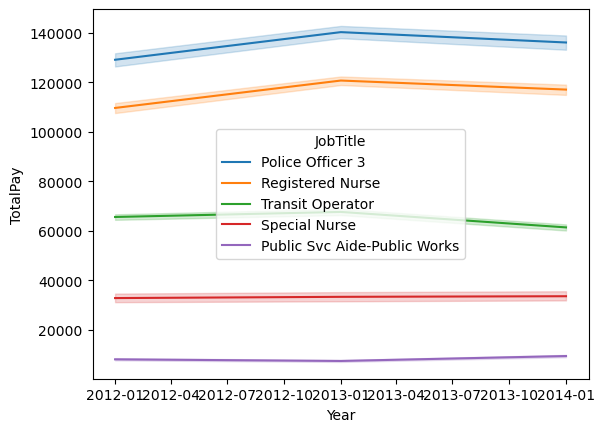

In [42]:
sns.lineplot(
    x=df2["Year"], y=df2["TotalPay"],
    data=df2.groupby(["JobTitle", "Year"])["TotalPay"].mean().to_frame(),hue=df2["JobTitle"]
)

In [48]:
#2. How are base pay, overtime pay, and benefits allocated between different Job Titles 
#(only look at the top 5 JobTitle and comments on your findings)?
#df2 is already set up with the top 5 job titles, so it will be used.
#Convert the data in the row to floats
df2['BasePay'] = pd.to_numeric(df2.BasePay)
#Group data by job title, then calculate the average Base Pay for each job title. 
df2.groupby(["JobTitle"])["BasePay"].mean()

JobTitle
Police Officer 3                108508.662621
Public Svc Aide-Public Works      8091.876070
Registered Nurse                102650.396486
Special Nurse                    29929.166718
Transit Operator                 51772.154465
Name: BasePay, dtype: float64

In [50]:
#Convert the data in the row to floats
df2['OvertimePay'] = pd.to_numeric(df2.OvertimePay)
#Group data by job title, then calculate the average Overtime Pay for each job title. 
df2.groupby(["JobTitle"])["OvertimePay"].mean()

JobTitle
Police Officer 3                16418.062615
Public Svc Aide-Public Works       60.017744
Registered Nurse                 4204.840575
Special Nurse                     651.723372
Transit Operator                11143.260866
Name: OvertimePay, dtype: float64

In [52]:
#Convert the data in the row to floats
df2['Benefits'] = pd.to_numeric(df2.Benefits)
#Group data by job title, then calculate the average Benefits Pay for each job title. 
df2.groupby(["JobTitle"])["Benefits"].mean()

JobTitle
Police Officer 3                32829.713693
Public Svc Aide-Public Works     1379.748050
Registered Nurse                35950.834170
Special Nurse                    3210.342240
Transit Operator                27355.597533
Name: Benefits, dtype: float64

In [54]:
#3. Is there any evidence of pay (use column TotalPayBenefits) discrimination based on gender in this dataset?
#First, install gender guesser using 'pip install gender-guesser' in command prompt
#Then, import the gender detector and set it to a variable d
import gender_guesser.detector as gender
d = gender.Detector()

In [58]:
#Extract first name from EmployeeName into its own column
df2["FirstName"] = df2["EmployeeName"].str.split(" ").str.get(0)
df2["FirstName"]

36314            Eric
36317         Timothy
36349     Constantine
36478           David
36527            Ruby
             ...     
148610           Ruby
148613        Nanette
148615        Marilou
148621        Kenneth
148625         Renato
Name: FirstName, Length: 20100, dtype: object

In [60]:
#Transform the derived first name into proper format by using str.capitalize in order for d.get_gender to work properly
df2["FirstName"].str.capitalize()

36314            Eric
36317         Timothy
36349     Constantine
36478           David
36527            Ruby
             ...     
148610           Ruby
148613        Nanette
148615        Marilou
148621        Kenneth
148625         Renato
Name: FirstName, Length: 20100, dtype: object

In [64]:
#Create new column 'Gender' and assign a value based on First Name column
df2["Gender"] = df2["FirstName"].map(lambda x: d.get_gender(x))

In [66]:
#Use groupby to check average TotalPayBenefits by job title and gender
df2.groupby(["JobTitle", "Gender"])["TotalPayBenefits"].mean()

JobTitle                      Gender       
Police Officer 3              andy             183691.118182
                              female           160897.269436
                              male             168789.883118
                              mostly_female    165413.842041
                              mostly_male      176835.718478
                              unknown          165145.887455
Public Svc Aide-Public Works  andy              12857.317400
                              female             9241.421417
                              male               9929.226753
                              mostly_female      9657.508571
                              mostly_male        8445.145075
                              unknown            9150.409663
Registered Nurse              andy             159585.746224
                              female           150297.176383
                              male             151697.614448
                              mostly_fema

<AxesSubplot:xlabel='Gender', ylabel='TotalPayBenefits'>

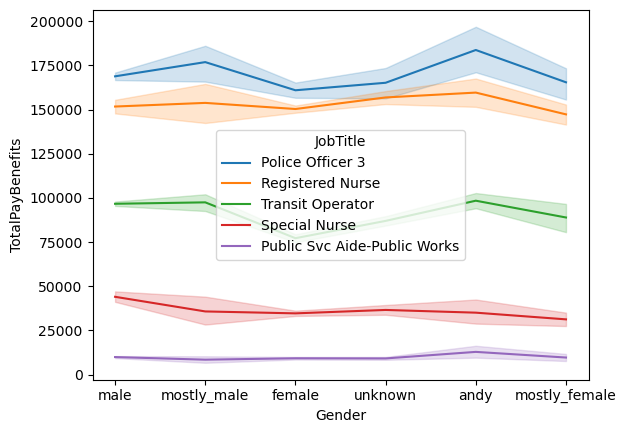

In [71]:
sns.lineplot(
    x=df2["Gender"], y=df2["TotalPayBenefits"],
    data=df2.groupby(["JobTitle", "Gender"])["TotalPayBenefits"].mean().to_frame(),hue=df2["JobTitle"]
)